# Heard Disease Prediction with ML

In [ ]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install joblib

In [ ]:
import joblib

In [ ]:
df = pd.read_csv(r'/content/heart_disease_dataset.csv')

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.shape

(303, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
# Total Missing values

df.isnull().sum().sum()

np.int64(0)

In [ ]:
# Check balance between diseased vs healthy paitent

df['target'].value_counts()

,count
target,
1,165
0,138


In [ ]:
print(f"{df['target'].value_counts()[1]/df['target'].value_counts()[0]:.2f}:1")

1.20:1


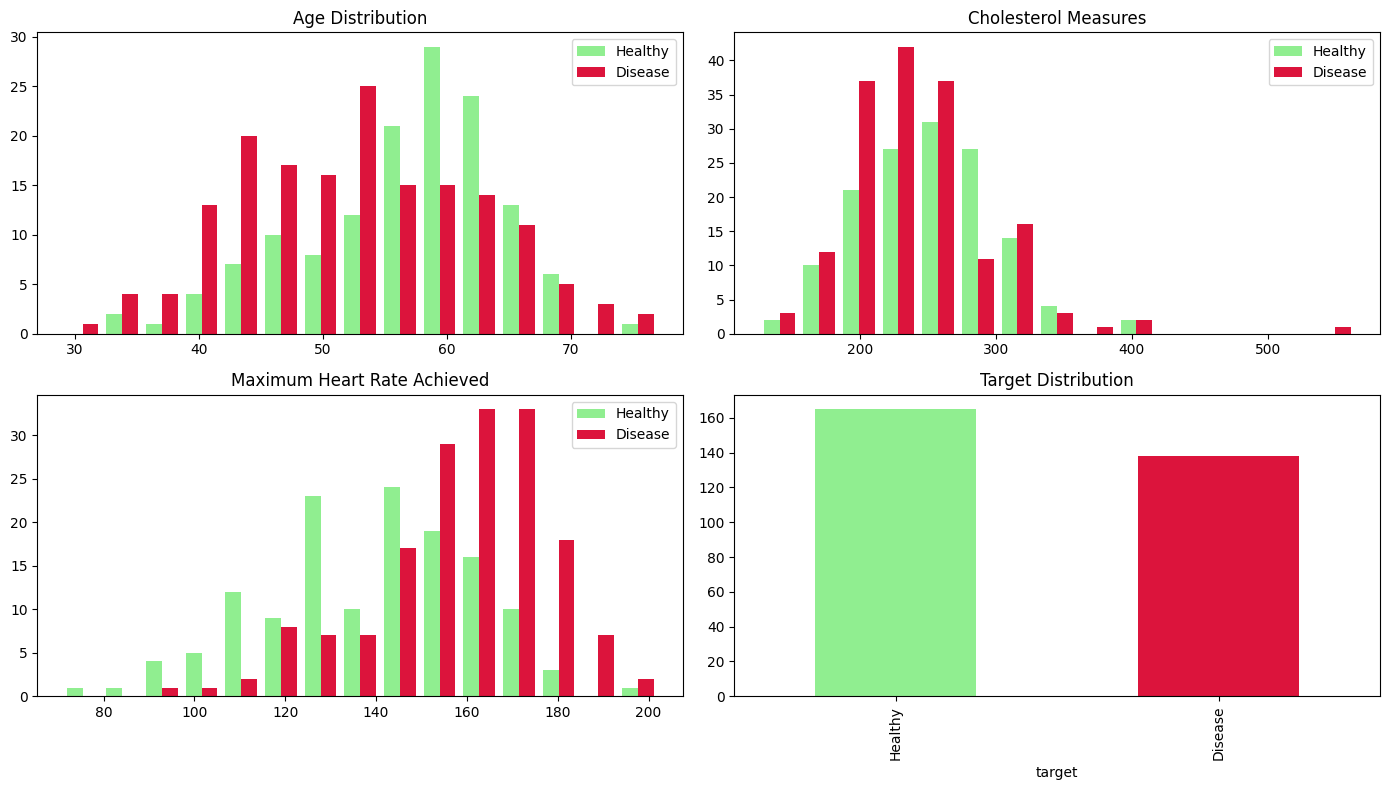

In [ ]:
# Analyze dataSet and Visualize data

fig, axes = plt.subplots(2, 2, figsize=(14, 8))

axes[0, 0].hist([df[df['target'] == 0]['age'], df[df['target'] == 1]['age']], label=['Healthy', 'Disease'], bins=15, color=['lightgreen', 'crimson'])
axes[0, 0].set_title('Age Distribution')
axes[0, 0].legend()

axes[0, 1].hist([df[df['target'] == 0]['chol'], df[df['target'] == 1]['chol']], label=['Healthy', 'Disease'], bins=15, color=['lightgreen', 'crimson'])
axes[0, 1].set_title('Cholesterol Measures')
axes[0, 1].legend()

axes[1, 0].hist([df[df['target'] == 0]['thalach'], df[df['target'] == 1]['thalach']], label=['Healthy', 'Disease'], bins=15, color=['lightgreen', 'crimson'])
axes[1, 0].set_title('Maximum Heart Rate Achieved')
axes[1, 0].legend()

df['target'].value_counts().plot(kind='bar', ax=axes[1, 1], color=['lightgreen', 'crimson'])
axes[1, 1].set_title('Target Distribution')
axes[1, 1].set_xticklabels(['Healthy', 'Disease'])

plt.tight_layout()
plt.show()

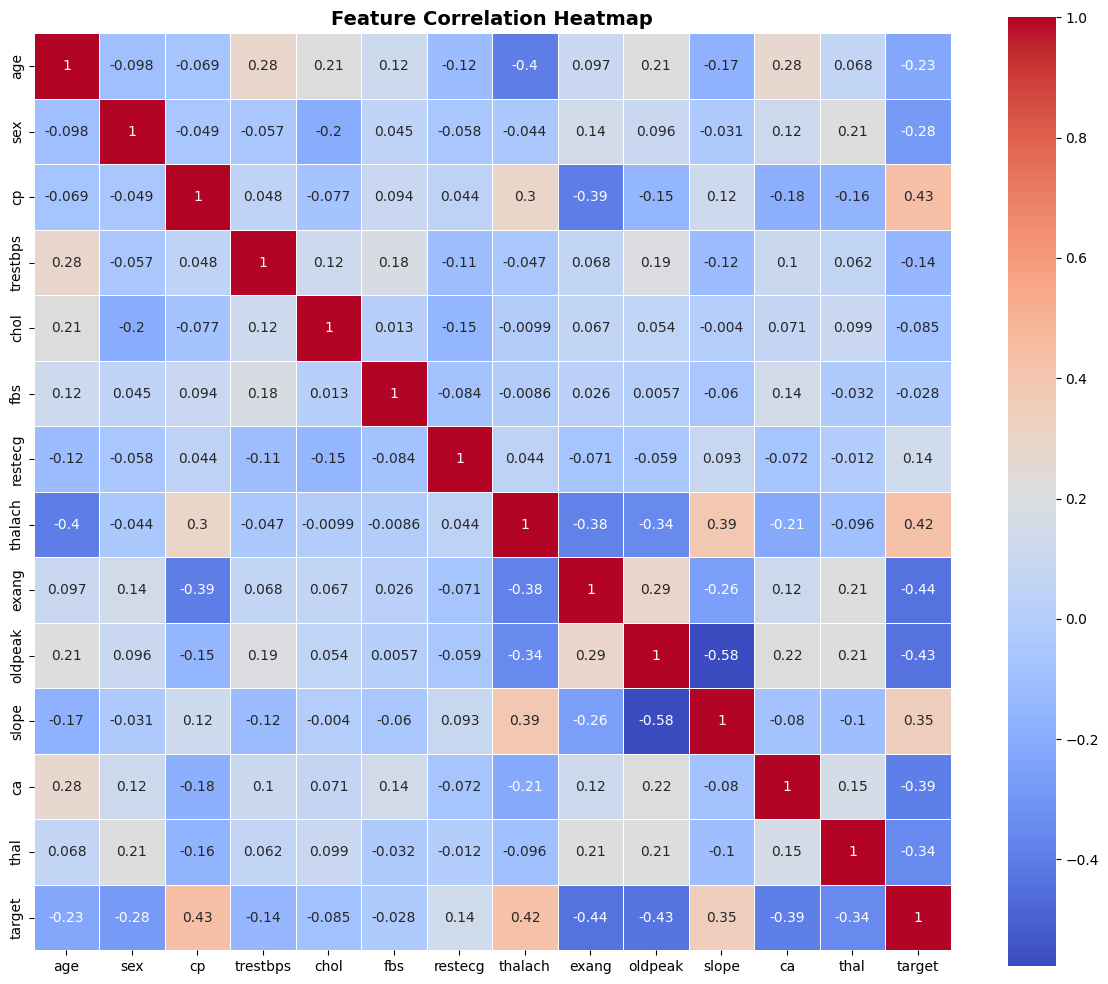

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5, square=True)
plt.title('Feature Correlation Heatmap', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [ ]:
X = df.drop(columns='target', axis=1)
y = df['target']

In [ ]:
X.shape

(303, 13)

In [ ]:
y.shape

(303,)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [ ]:
X_train.shape

(242, 13)

In [ ]:
X_test.shape

(61, 13)

In [ ]:
# Scale the data

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
joblib.dump(scaler, 'heart_scaler.pkl')

['heart_scaler.pkl']

In [ ]:
# Train the model

model = LogisticRegression(max_iter=1000, random_state=42)
score = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f"{score.mean():.4f} (+/- {score.std():.4f})")

0.8309 (+/- 0.0409)


In [ ]:
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
# Prediction and Scoring

y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

print(classification_report(y_test, y_test_pred, target_names=['Healthy', 'Disease']))

Train Accuracy: 0.8430
Test Accuracy: 0.8033
              precision    recall  f1-score   support

     Healthy       0.86      0.68      0.76        28
     Disease       0.77      0.91      0.83        33

    accuracy                           0.80        61
   macro avg       0.82      0.79      0.80        61
weighted avg       0.81      0.80      0.80        61



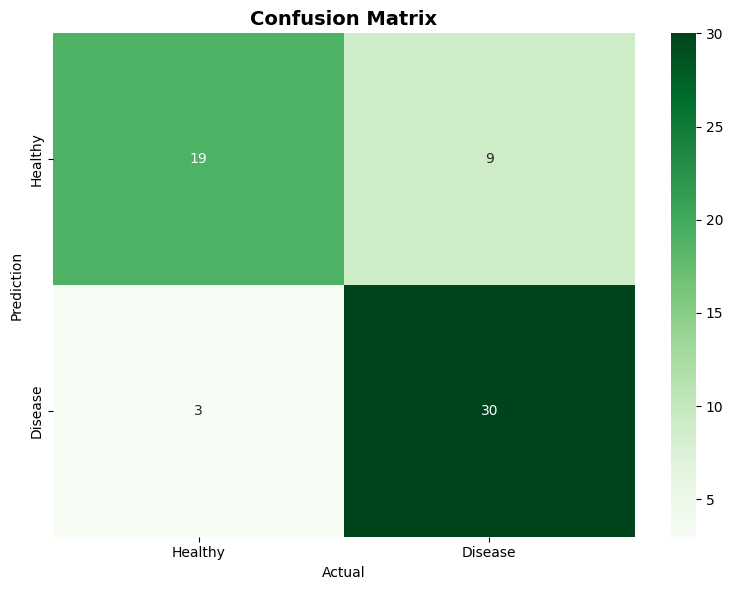

In [ ]:
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=True, xticklabels=['Healthy', 'Disease'], yticklabels=['Healthy', 'Disease'])
plt.title('Confusion Matrix', fontsize=14, fontweight='bold')
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.tight_layout()
plt.show()

In [ ]:
# Save the model

model_data = {
    "model": model,
    "feature_names": X.columns.tolist()
}

joblib.dump(model_data, "heart_disease_model.pkl")

['heart_disease_model.pkl']

In [52]:
# Take user input and predict

print("Please Enter your data to predict heart disease risk using Machine Learning")

age = int(input("Age: "))
sex = int(input("Sex (0 = Female, 1 = Male): "))

print("Heart Metrics")
cp = int(input("Chest Pain Type [0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Asymptomatic: "))
trestbps = int(input("Resting Blood Pressure (mm Hg) 90 - 200: "))
chol = int(input("Cholesterol (mg/dl) 100 - 600: "))
fbs = bool(input("Fasting Blood Sugar > 120 mg/dl [0 = Yes, 1 = No]: "))
restecg = int(input("Resting ECG [0 = Normal, 1 = ST-T Abnormality, 2 = LV Hypertrophy]: "))
thalach = int(input("Max Heart Rate between 60 to 220: "))
exang = bool(input("Exercise Induced Angina [0 = Yes, 1 = No]: "))
oldpeak = float(input("ST Depression - 0.0, 6.0, 1.0, 0.1: " ))
slope = int(input("Slope of Peak Exercise ST  [0 = Upsloping, 1 = Flat, 2 = Downsloping]: "))
ca = int(input("Number of Major Vessels (0-3): "))
thal = int(input("Thalassemia [1 = Normal, 2 = Fixed Defect, 3 = Reversible Defect]: "))


input_data = {
            'age': age, 'sex': sex, 'cp': cp, 'trestbps': trestbps,
            'chol': chol, 'fbs': fbs, 'restecg': restecg, 'thalach': thalach,
            'exang': exang, 'oldpeak': oldpeak, 'slope': slope, 'ca': ca, 'thal': thal
        }

input_df = pd.DataFrame([input_data])

input_scaled = scaler.transform(input_df)

prediction = model.predict(input_scaled)[0]
proba = model.predict_proba(input_scaled)[0]

if prediction == 1:
  print("You Have Disease Risk.")
else:
  print("You Are Healthy.")


Please Enter your data to predict heart disease risk using Machine Learning
Age: 26
Sex (0 = Female, 1 = Male): 1
Heart Metrics
Chest Pain Type [0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Asymptomatic: 3
Resting Blood Pressure (mm Hg) 90 - 200: 120
Cholesterol (mg/dl) 100 - 600: 250
Fasting Blood Sugar > 120 mg/dl [0 = Yes, 1 = No]: 120
Resting ECG [0 = Normal, 1 = ST-T Abnormality, 2 = LV Hypertrophy]: 0
Max Heart Rate between 60 to 220: 90
Exercise Induced Angina [0 = Yes, 1 = No]: 1
ST Depression - 0.0, 6.0, 1.0, 0.1: 0.2
Slope of Peak Exercise ST  [0 = Upsloping, 1 = Flat, 2 = Downsloping]: 0
Number of Major Vessels (0-3): 3
Thalassemia [1 = Normal, 2 = Fixed Defect, 3 = Reversible Defect]: 1
You Are Healthy.
